# Introduction to neural networks

## Questions

### 2
A xor B = A ^ ~B v (~A ^ B)

Rysunek w zeszycie

### 3
Perceptron jest zbieżny jedynie w przypadku gdy dane są liniowo separowalne.

### 4
Użycie logistycznej funkcji aktywacji było podyktowane tym, że gradient tej funkcji jest niezerowy w całej swojej dziedzinie. Z tego powodu algorytm gradientu prostego nie zatrzymywał się.

### 5
- RELU max(0, x)
- Leaky RELU max(/alpha x, x), /alpha /in (0, 1)
- sigmoid e^(-x) / (1 - e^(-x))

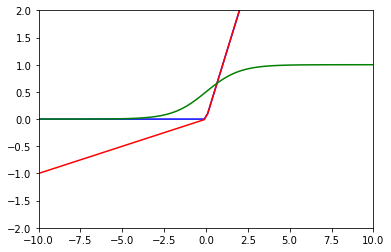

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
zeros = np.zeros(n)
x = np.linspace(-10, 10, n)

relu  = np.maximum(zeros, x)
plt.plot(x, relu, 'b-')

alpha = 0.1
l_relu = np.maximum(alpha*x, x)
plt.plot(x, l_relu, 'r-')

sigm = 1 / (1 + np.exp(-x))
plt.plot(x, sigm, 'g-')


plt.xlim((-10, 10))
plt.ylim((-2, 2))
plt.show()

### 6
Y = XW + b

X.dim = (-1, 10)
W_u.dim = (10, 50)   b_u.dim = (50)
W_wy.dim = (50, 3)   b_wy.dim = (3)

Y.dim = (-1, 3)

Y = X_wy * (X * W_u + b_u) + b_wy

### 7
ham / spam - jeden neuron, aktywacja sigmoid(logistyczna), wartość neuronu określa prawdopodobieństwo należenia próbki do spamu

MNIST - dziesięć neuronów, aktywacja softmax

Housing - jeden neuron, aktywacja brak / liniowa

### 8
Propagacja wsteczna - algorytm poprawiania wag sieci neuronowej wykorzystujący odwrotne różnioczkowanie automatyczne

Odwrotne różniczkowanie automatyczne - algorytm automatycznie obliczający gradienty w sieci neuronowej

### 9
- liczba warstw
- liczba neuronów w warstwie
- występowanie biasu
- funkcja aktywacji
- współczynnik uczenia
- liczba próbek w batchu

W przypadku przetrenowania należy spróbować zmniejszyć liczbę neuronów w warstwach lub liczbę warstw.

### 10
MNIST 

In [37]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *

from matplotlib import pyplot as plt
%matplotlib inline

(60000,)

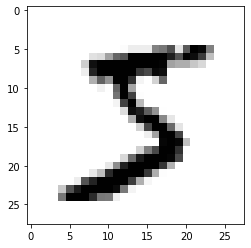

In [20]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train_full[0], cmap='binary')
y_train_full.shape

In [46]:
X_train, y_train = X_train_full[:50_000] / 255., y_train_full[:50_000]
X_valid, y_valid = X_train_full[50_000:] / 255., y_train_full[50_000:]

In [16]:
tensorboard_path = os.path.join(os.curdir, 'my_logs')
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(tensorboard_path, run_id)

In [108]:
def build_model(hidden_layer_size):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(hidden_layer_size, activation='relu'))
    model.add(Dense(hidden_layer_size, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

#### Finding best learingn rate

In [101]:
K = tf.keras.backend

class ExponensionalLR(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.lr = []
        self.loss = []
    def on_batch_end(self, batch, logs):
        self.lr.append(K.get_value(self.model.optimizer.lr))
        self.loss.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.factor * self.model.optimizer.lr )

In [109]:
model = build_model(256)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=SGD(lr=1e-3),
             metrics=['accuracy'])
model.summary()
lr_clb = ExponensionalDecayLR(1.005)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[lr_clb], epochs=1)

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 5s 91us/sample - loss: 2027108959410483737133056.0000 - accuracy: 0.6447 - val_loss: 2.3269 - val_accuracy: 0.0991


(0.0, 2.0)

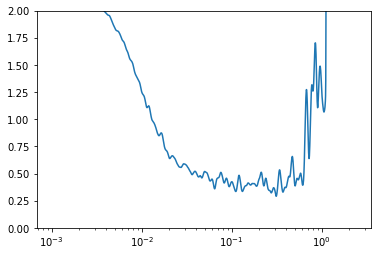

In [111]:
import numpy
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

plt.plot(lr_clb.lr, smooth(np.array(lr_clb.loss), window_len=30))
plt.gca().set_xscale('log')
plt.ylim((0, 2.))

In [112]:
tf.keras.backend.clear_session()


model = build_model(256)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=SGD(lr=2e-1),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [113]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir())
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, 
          callbacks=[tensorboard_cb, earlystop_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/sample - loss: 0.2478 - accuracy: 0.9243 - val_loss: 0.1393 - val_accuracy: 0.9577
Epoch 2/50
50000/50000 [==============================] - 4s 89us/sample - loss: 0.0973 - accuracy: 0.9696 - val_loss: 0.1031 - val_accuracy: 0.9695
Epoch 3/50
50000/50000 [==============================] - 4s 89us/sample - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.1153 - val_accuracy: 0.9652
Epoch 4/50
50000/50000 [==============================] - 4s 86us/sample - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.2374 - val_accuracy: 0.9392
Epoch 5/50
50000/50000 [==============================] - 4s 85us/sample - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0820 - val_accuracy: 0.9764
Epoch 6/50
50000/50000 [==============================] - 4s 82us/sample - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0778 - val_accuracy: 0.9799
Epoch 7/50
50000/50000 [==============================] 

In [107]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
